In [1]:
import numpy as np
import matplotlib.pyplot as plt


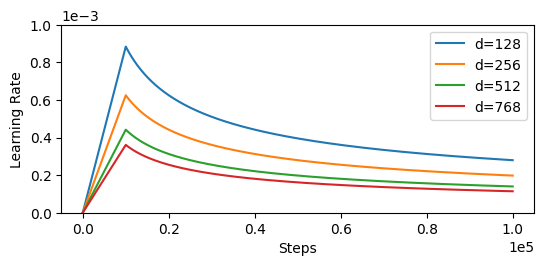

In [11]:
def lr_multiplier(step_num, warmup_steps, d_model):
    possible_lr = np.stack(
        [np.power(step_num, -0.5), step_num * np.power(warmup_steps, -1.5)]
    )
    lr_multiplier = np.min(possible_lr, axis=0)

    return np.power(d_model, -0.5) * lr_multiplier


warmup_steps = 10000

steps = np.arange(1, 100000)

fig, ax = plt.subplots(1, 1, figsize=(6.102362, 2.44094))

ax.plot(
    steps, lr_multiplier(steps, warmup_steps=warmup_steps, d_model=128), label="d=128"
)
ax.plot(
    steps, lr_multiplier(steps, warmup_steps=warmup_steps, d_model=256), label="d=256"
)
ax.plot(
    steps, lr_multiplier(steps, warmup_steps=warmup_steps, d_model=512), label="d=512"
)
ax.plot(
    steps, lr_multiplier(steps, warmup_steps=warmup_steps, d_model=768), label="d=768"
)
ax.legend()

# ax.vlines(x=warmup_steps, ymin=0, ymax=0.0010, color="k", zorder=0, ls="--")
ax.set_xlabel("Steps")
ax.set_ylabel("Learning Rate")

ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 4))

ax.set_ylim(0, 1.0e-3)

fig.savefig(
    "../public/learning_rates_by_dimension.svg",
    pad_inches=0.0,
    bbox_inches="tight",
    transparent=True,
)


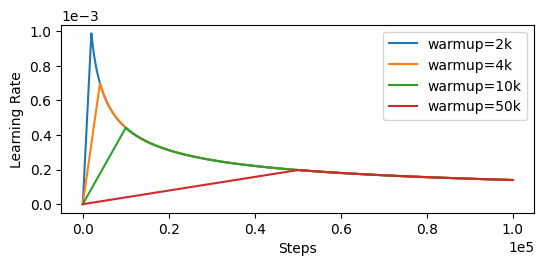

In [12]:
def lr_multiplier(step_num, warmup_steps, d_model):
    possible_lr = np.stack(
        [np.power(step_num, -0.5), step_num * np.power(warmup_steps, -1.5)]
    )
    lr_multiplier = np.min(possible_lr, axis=0)

    return np.power(d_model, -0.5) * lr_multiplier


steps = np.arange(1, 100000)

fig, ax = plt.subplots(1, 1, figsize=(6.102362, 2.44094))

warmup_steps = [2000, 4000, 10000, 50000]

ax.plot(
    steps,
    lr_multiplier(steps, warmup_steps=warmup_steps[0], d_model=512),
    label="warmup=2k",
)
ax.plot(
    steps,
    lr_multiplier(steps, warmup_steps=warmup_steps[1], d_model=512),
    label="warmup=4k",
)
ax.plot(
    steps,
    lr_multiplier(steps, warmup_steps=warmup_steps[2], d_model=512),
    label="warmup=10k",
)
ax.plot(
    steps,
    lr_multiplier(steps, warmup_steps=warmup_steps[3], d_model=512),
    label="warmup=50k",
)
ax.legend()

# ax.vlines(x=warmup_steps, ymin=0, ymax=0.0010, color="k", zorder=0, ls="--")
ax.set_xlabel("Steps")
ax.set_ylabel("Learning Rate")

ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 4))

fig.savefig(
    "../public/learning_rates_by_warmup.svg",
    pad_inches=0.0,
    bbox_inches="tight",
    transparent=True,
)
